In [31]:
import json
import pandas as pd
import numpy as np
import os
import re
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [129]:
left_eye = []
right_eye = []
nose = []
neck = []
root_of_tail = []
left_shoulder = []
left_elbow = []
left_front_paw = []
right_shoulder = []
right_elbow = []
right_front_paw = []
left_hip = []
left_knee = []
left_back_paw = []
right_hip = []
right_knee = []
right_back_paw = []

In [130]:
p = open('preds.json')
preds_list = json.load(p)
preds_list[1]
keypoints = []
ids = []

for d in preds_list:
    for i, p in zip(d['image_paths'], d['preds']):
        m = i.split('/')[3]
        m = re.search('(.+?)_\d_', m)
        m = m.group(1)
        m = m.split('_')
        m = m[0]+m[1]
        id = int(m)
       
        keypoints.append((id, p))
        ids.append(id)
        left_eye.append((p[0][0], p[0][1]))
        right_eye.append((p[1][0], p[1][1]))
        nose.append((p[2][0], p[2][1]))
        neck.append((p[3][0], p[3][1]))
        root_of_tail.append((p[4][0], p[4][1]))
        left_shoulder.append((p[5][0], p[5][1]))
        left_elbow.append((p[6][0], p[6][1]))
        left_front_paw.append((p[7][0], p[7][1]))
        right_shoulder.append((p[8][0], p[8][1]))
        right_elbow.append((p[9][0], p[9][1]))
        right_front_paw.append((p[10][0], p[10][1]))
        left_hip.append((p[11][0], p[11][1]))
        left_knee.append((p[12][0], p[12][1]))
        left_back_paw.append((p[13][0], p[13][1]))
        right_hip.append((p[14][0], p[14][1]))
        right_knee.append((p[15][0], p[15][1]))
        right_back_paw.append((p[16][0], p[16][1]))

        

In [131]:
key_dict = {'id': ids, 
'left_eye': left_eye, 
'right_eye': right_eye, 
'nose': nose,
'neck': neck,
'root_of_tail': root_of_tail,
'left_shoulder': left_shoulder,
'left_elbow': left_elbow,
'left_front_paw': left_front_paw,
'right_shoulder': right_shoulder,
'right_elbow': right_elbow,
'right_front_paw': right_front_paw,
'left_hip': left_hip,
'left_knee': left_knee,
'left_back_paw': left_back_paw,
'right_hip': right_hip,
'right_knee': right_knee,
'right_back_paw': right_back_paw}


In [135]:
keys = pd.DataFrame().from_dict(key_dict)
keys.shape

(1596, 18)

In [136]:
coords = pd.read_csv('coordinates.csv')
for i, row in coords.iterrows():
    m = m = re.search('(.+?)_\d_', row['filename'])
    coords.loc[i,'id'] = int(m.group(1))

In [137]:
coords.head()

,filename,left,top,width,height,id
0,1569153660_05415_5_cropped.jpg,1251,1,263,218,1.569154e+14
1,1569153660_05481_7_cropped.jpg,527,92,295,312,1.569154e+14
2,1569160860_02052_7_cropped.jpg,637,51,288,262,1.569161e+14
3,1569164640_02160_7_cropped.jpg,436,204,402,296,1.569165e+14
4,1569164640_02224_7_cropped.jpg,435,206,403,296,1.569165e+14


In [139]:
coords_full = pd.merge(coords, keys, how = "inner", on="id")

In [234]:
coords_full.head().iloc[:,6:]

,left_eye,right_eye,nose,neck,root_of_tail,left_shoulder,left_elbow,left_front_paw,right_shoulder,right_elbow,right_front_paw,left_hip,left_knee,left_back_paw,right_hip,right_knee,right_back_paw
0,"(778.7802734375, 224.72169494628906)","(690.7041015625, 157.90528869628906)","(693.7412109375, 239.90724182128906)","(651.2216796875, 303.6865234375)","(763.5947265625, 106.27442932128906)","(681.5927734375, 361.3916015625)","(708.9267578125, 321.9091796875)","(705.8896484375, 376.5771484375)","(623.8876953125, 261.1669921875)","(617.8134765625, 309.7607421875)","(575.2939453125, 361.3916015625)","(678.5556640625, 200.42481994628906)","(736.2607421875, 376.5771484375)","(800.0400390625, 382.6513671875)","(596.5537109375, 288.5009765625)","(575.2939453125, 318.8720703125)","(797.0029296875, 376.5771484375)"
1,"(807.1259765625, 126.8466796875)","(725.8466796875, 34.3564453125)","(697.8193359375, 196.9150390625)","(711.8330078125, 216.5341796875)","(683.8056640625, 129.6494140625)","(725.8466796875, 199.7177734375)","(728.6494140625, 252.9697265625)","(731.4521484375, 292.2080078125)","(655.7783203125, 188.5068359375)","(666.9892578125, 219.3369140625)","(695.0166015625, 289.4052734375)","(902.4189453125, 143.6630859375)","(702.0234375, 2.125)","(896.8134765625, 241.7587890625)","(905.2216796875, 140.8603515625)","(905.2216796875, 194.1123046875)","(896.8134765625, 241.7587890625)"
2,"(466.1533203125, 228.14549255371094)","(462.2373046875, 220.31346130371094)","(454.4052734375, 224.22947692871094)","(548.3896484375, 251.64158630371094)","(755.9384765625, 243.80955505371094)","(579.7177734375, 357.3740234375)","(614.9619140625, 423.9462890625)","(614.9619140625, 470.9384765625)","(603.2138671875, 361.2900390625)","(622.7939453125, 420.0302734375)","(614.9619140625, 467.0224609375)","(732.4423828125, 357.3740234375)","(748.1064453125, 416.1142578125)","(755.9384765625, 482.6865234375)","(767.6865234375, 345.6259765625)","(802.9306640625, 388.7021484375)","(818.5947265625, 467.0224609375)"
3,"(469.154296875, 221.986328125)","(473.080078125, 218.060546875)","(457.376953125, 218.060546875)","(551.595703125, 253.392578125)","(751.810546875, 241.615234375)","(575.150390625, 355.462890625)","(610.482421875, 418.275390625)","(614.408203125, 465.384765625)","(606.556640625, 363.314453125)","(626.185546875, 414.349609375)","(614.408203125, 457.533203125)","(728.255859375, 367.240234375)","(751.810546875, 418.275390625)","(755.736328125, 485.013671875)","(787.142578125, 347.611328125)","(806.771484375, 390.794921875)","(826.400390625, 469.310546875)"
4,"(460.43359375, 230.66795349121094)","(464.37890625, 214.88670349121094)","(456.48828125, 222.77732849121094)","(551.17578125, 246.44920349121094)","(752.38671875, 242.50389099121094)","(574.84765625, 352.97265625)","(614.30078125, 423.98828125)","(614.30078125, 467.38671875)","(610.35546875, 360.86328125)","(630.08203125, 420.04296875)","(614.30078125, 467.38671875)","(724.76953125, 364.80859375)","(748.44140625, 416.09765625)","(752.38671875, 483.16796875)","(787.89453125, 345.08203125)","(807.62109375, 400.31640625)","(827.34765625, 471.33203125)"


In [241]:
coords_full.to_csv("coords_with_keypoints.csv")

# Visualization

In [251]:
p = '1574074800_03124_1_superimposed.jpg'
image = 'data/' + p
m = image.split('/')[1]
m = re.search('(.+?)_\d_', m)
m = m.group(1)
m = m.split('_')
m = int(m[0]+m[1])
points = coords_full[coords_full.id == m].iloc[:,6:].values[0]
img = mpimg.imread(image)

In [252]:
x = [i[0] for i in points]
y = [i[1] for i in points]

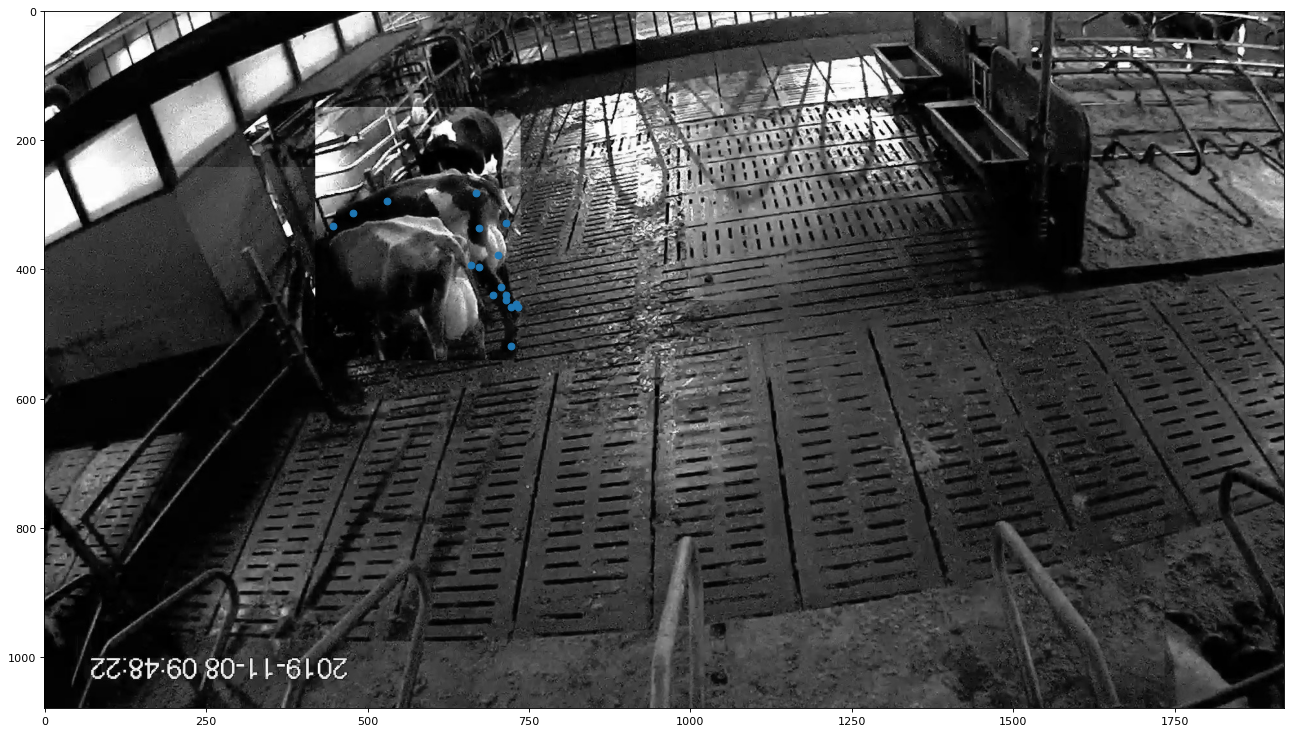

In [253]:
figure(figsize=(20, 20), dpi=80)
plt.imshow(img)
plt.scatter(x,y)